#  🔳 <font color='green'> <u>  HYPOTHESIS TESTING  </u> 🔳

---

# <font color ="Red"> Steps in Hypothesis Testing:

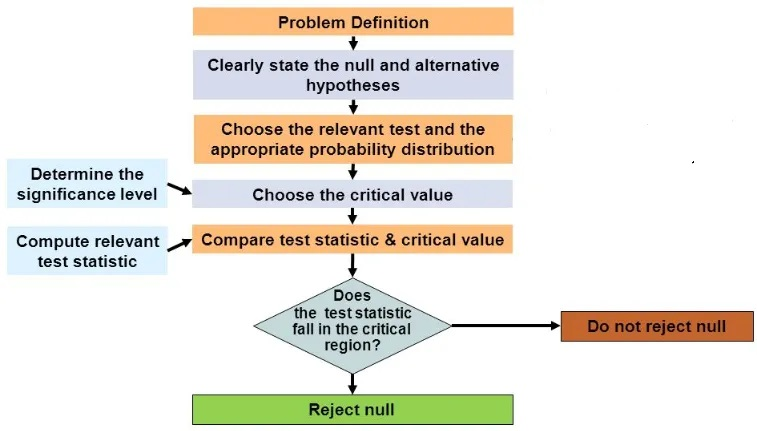

<br>

# <font color ="Red"> Which test to perform:

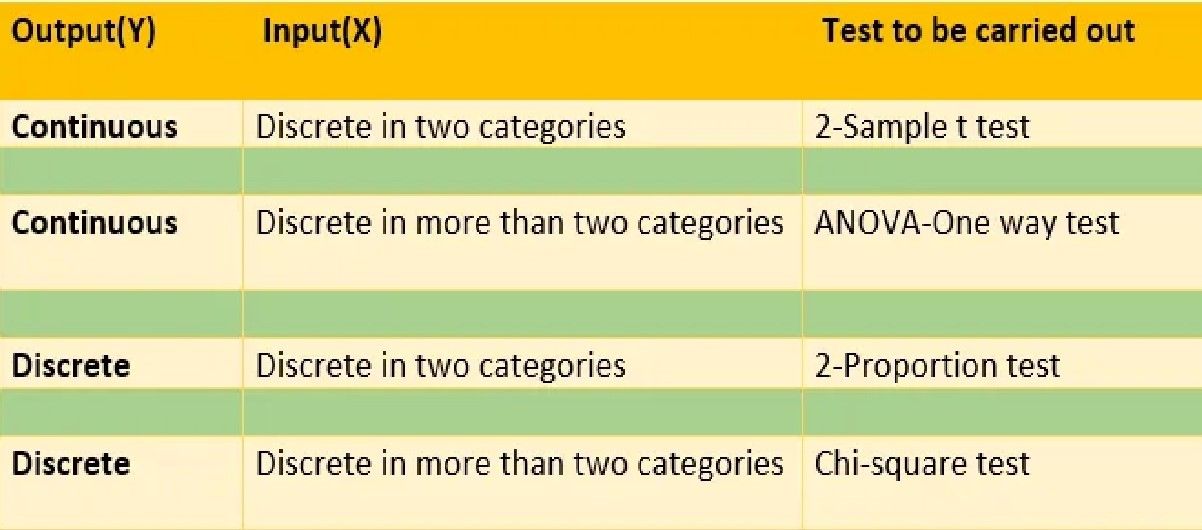

<br>

# <font color ="Red"> Conditions to reject null hypothesis or fail to reject:

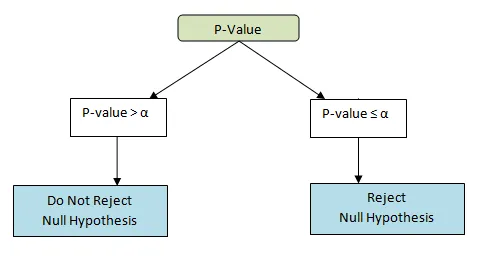

<br><br>
___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as sp
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

___

# <font color ="lime "> QUESTION 1️⃣  

## A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions. (Minitab File : Cutlets.mtw)

### <font color='magenta'>Solution ➡   Here manager wants to check whether the diameter of cutlets from two units is same or not. If they are not same then he needs to take some necessary action against the problem. We have randomly selected samples of diameters from both units. And we are going to check whether the mean of diameter of cutlets from both units is equal or not for that we are going to conduct <font color = "Green"> Two Tailed t-test </font> on 2 Independent samples with Numerical Data.

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
data_Q1 = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/Cutlets.csv')
data_Q1.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


___

* ### <font color = 'blue'> <u> DATA ANALYSIS </u>

 ##### <font color ='green'> <u>Data Summary</u>

In [3]:
data_Q1.shape

(35, 2)

In [4]:
data_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


##### <font color ='green'> <u>Descriptive statistics</u>

In [5]:
data_Q1.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
data_Q1.isna().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
data_Q1.duplicated().sum()

0

> * #### There are 32 records for each unit A and unit B with no null value and no duplicate values.
> * #### The mean diameter of cutlets in Unit A is 7.0 and that of Unit B is 6.9 cm.

 ##### <font color ='green'> <u>Data Visualisation</u>

{'whiskers': [<matplotlib.lines.Line2D at 0x176fa5e1450>,
 'caps': [<matplotlib.lines.Line2D at 0x176fa5e1990>,
 'boxes': [<matplotlib.lines.Line2D at 0x176fa5e11b0>,
 'medians': [<matplotlib.lines.Line2D at 0x176fa5e1ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x176fa5e2410>,
 'means': [<matplotlib.lines.Line2D at 0x176fa5e2170>,
  <matplotlib.lines.Line2D at 0x176fa5e36a0>]}

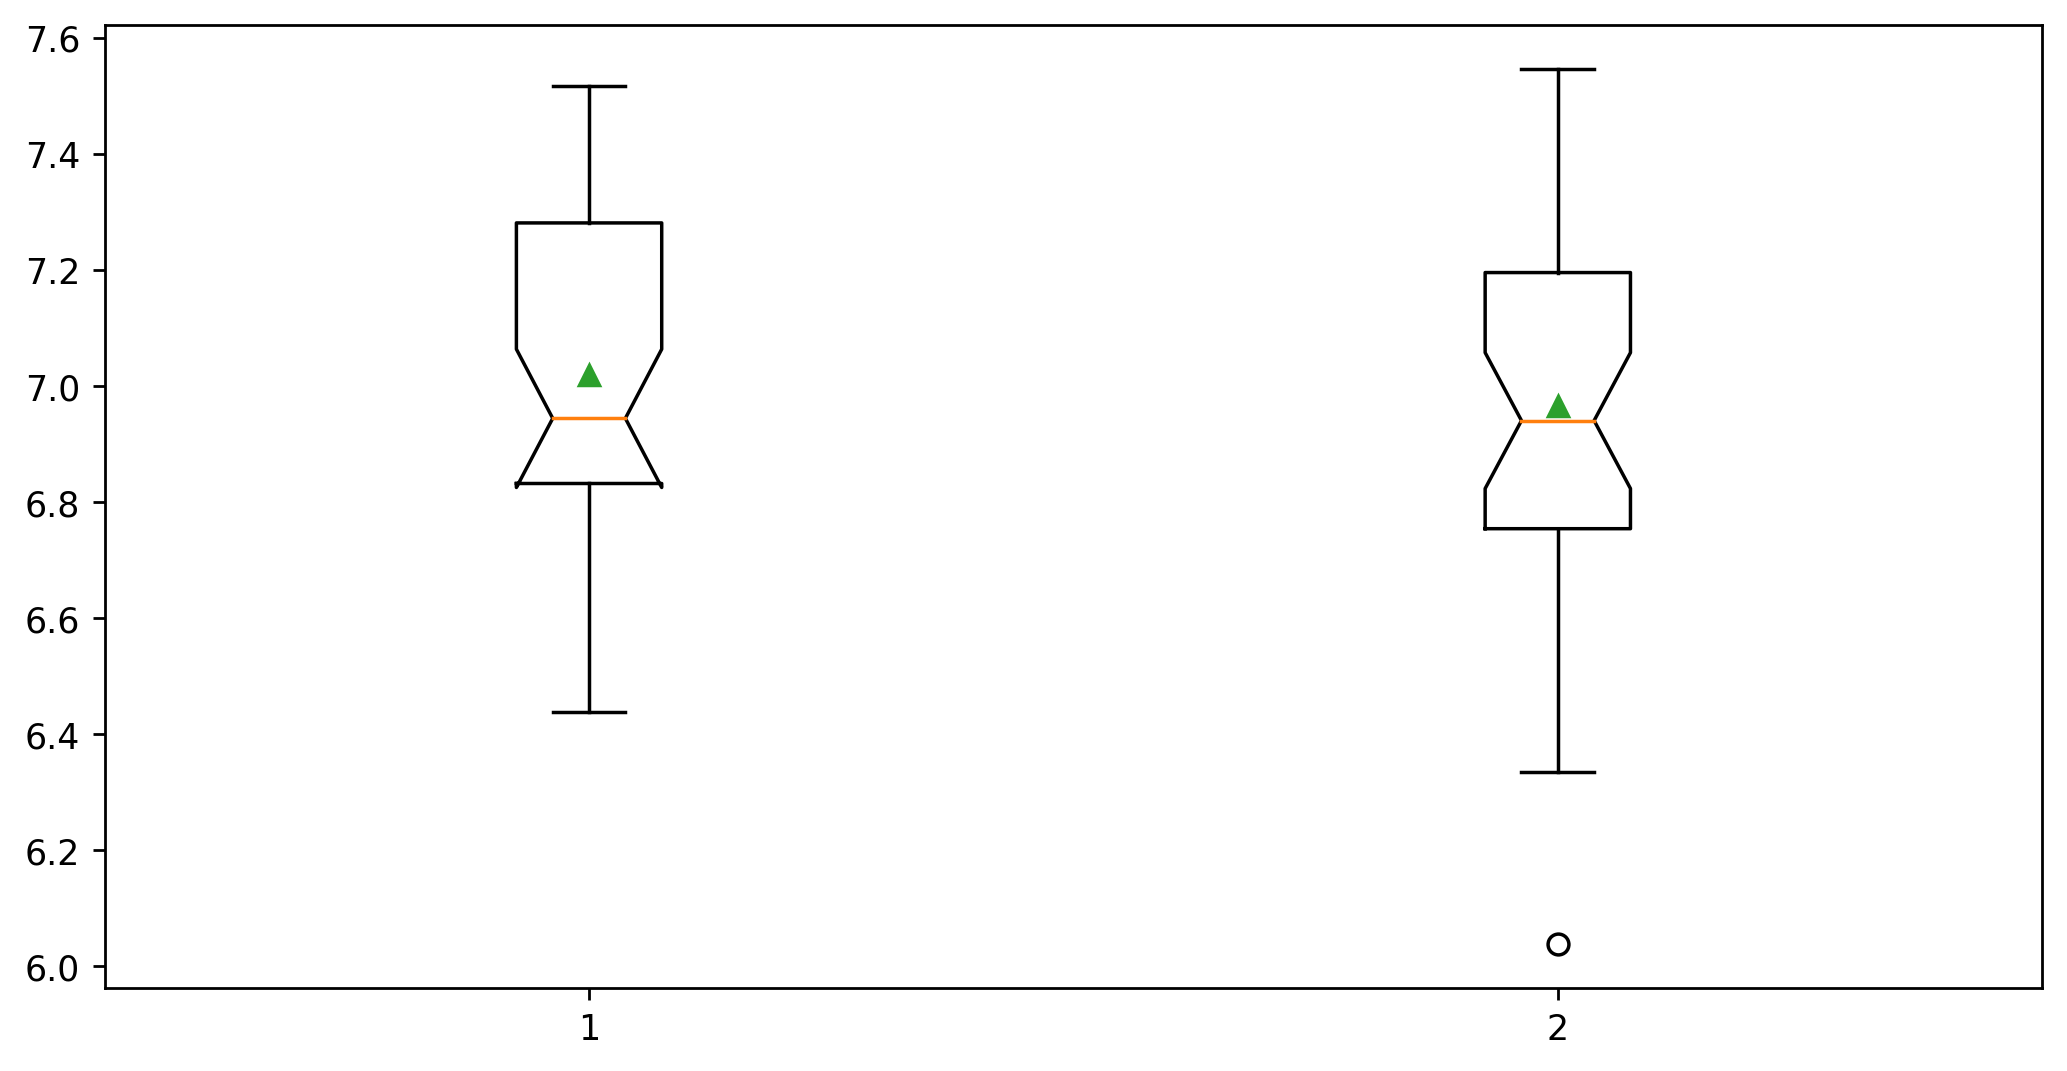

In [8]:
plt.boxplot(data_Q1, showmeans= True, notch= True)

<Axes: >

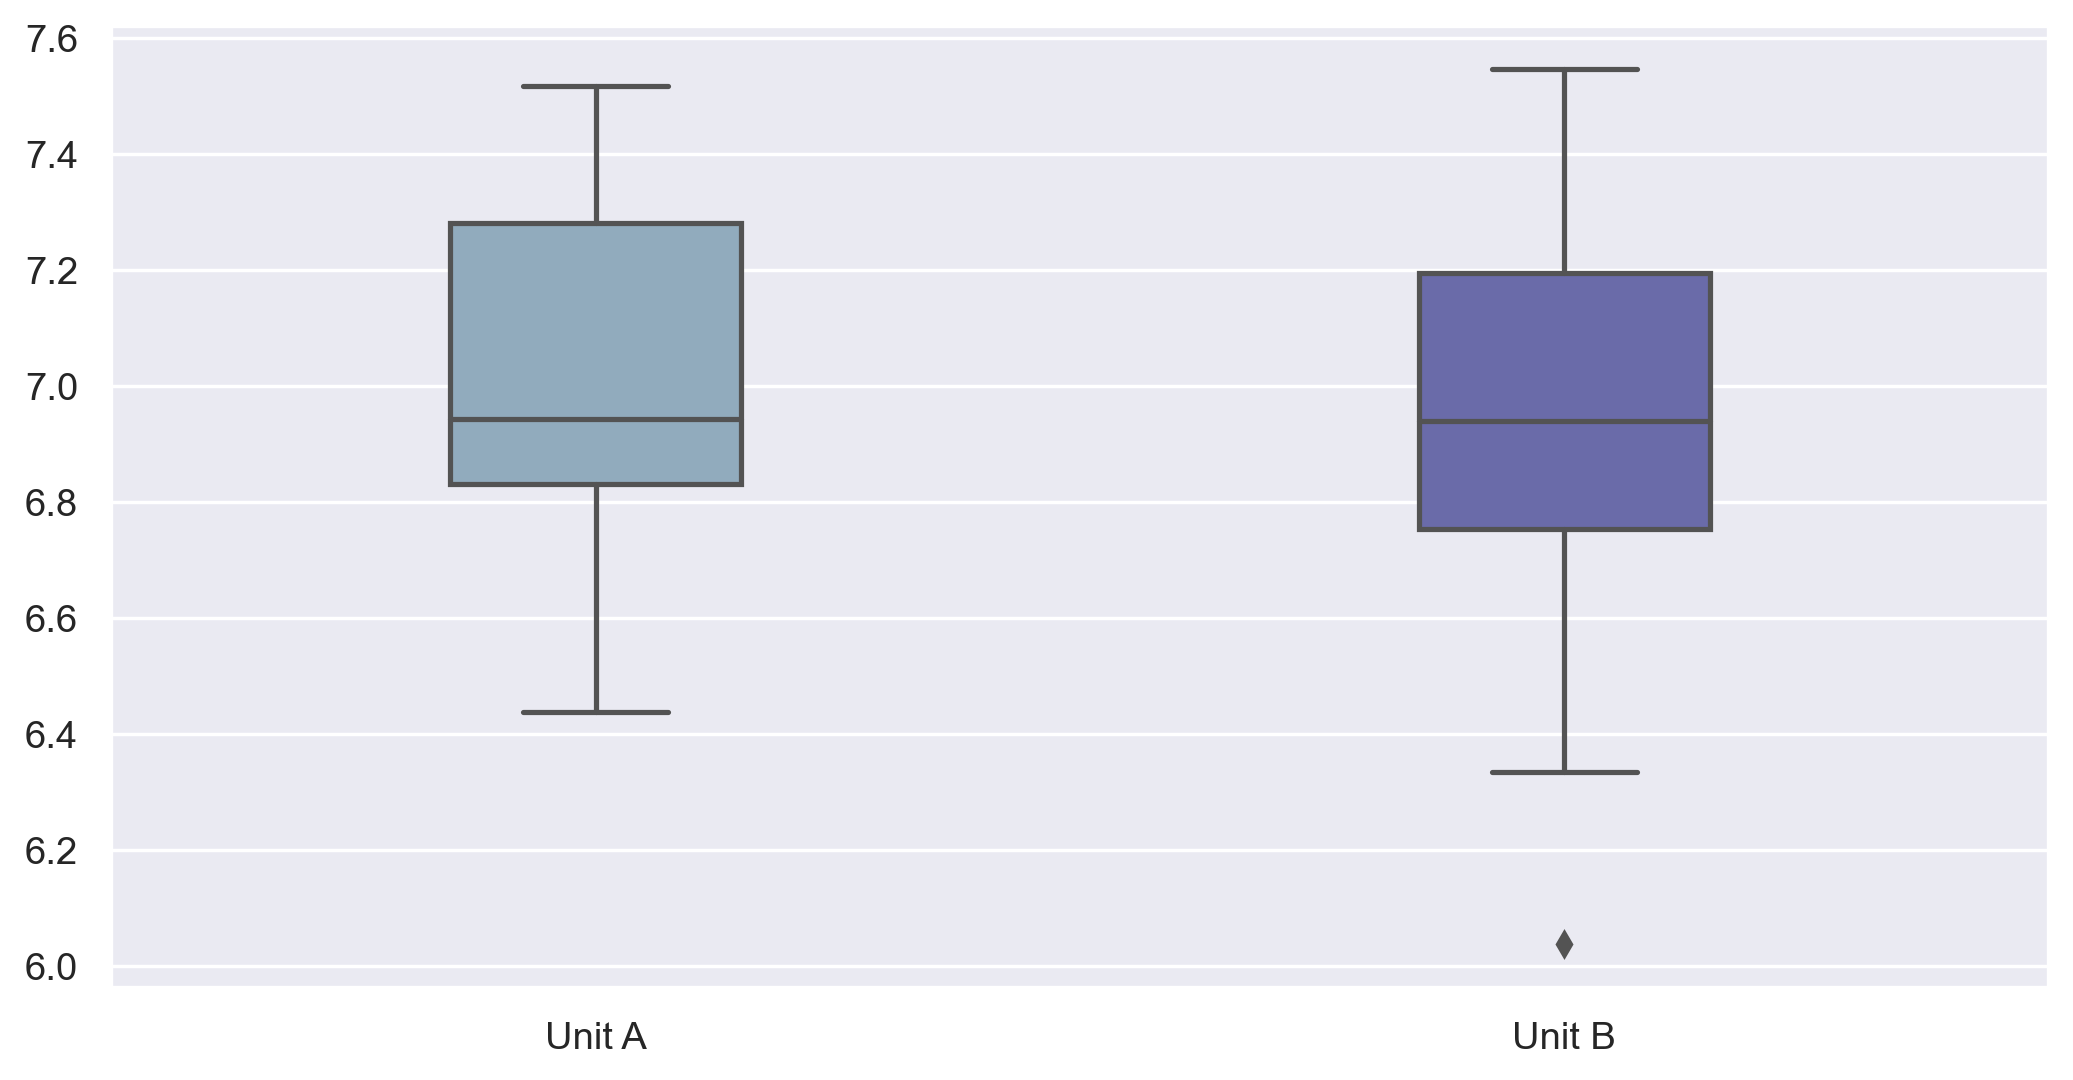

In [9]:
sns.set_theme(style='darkgrid', palette='twilight')
sns.boxplot(data = data_Q1, width = 0.3,)

Text(0.5, 1.0, 'Q-Q Plot for Unit B')

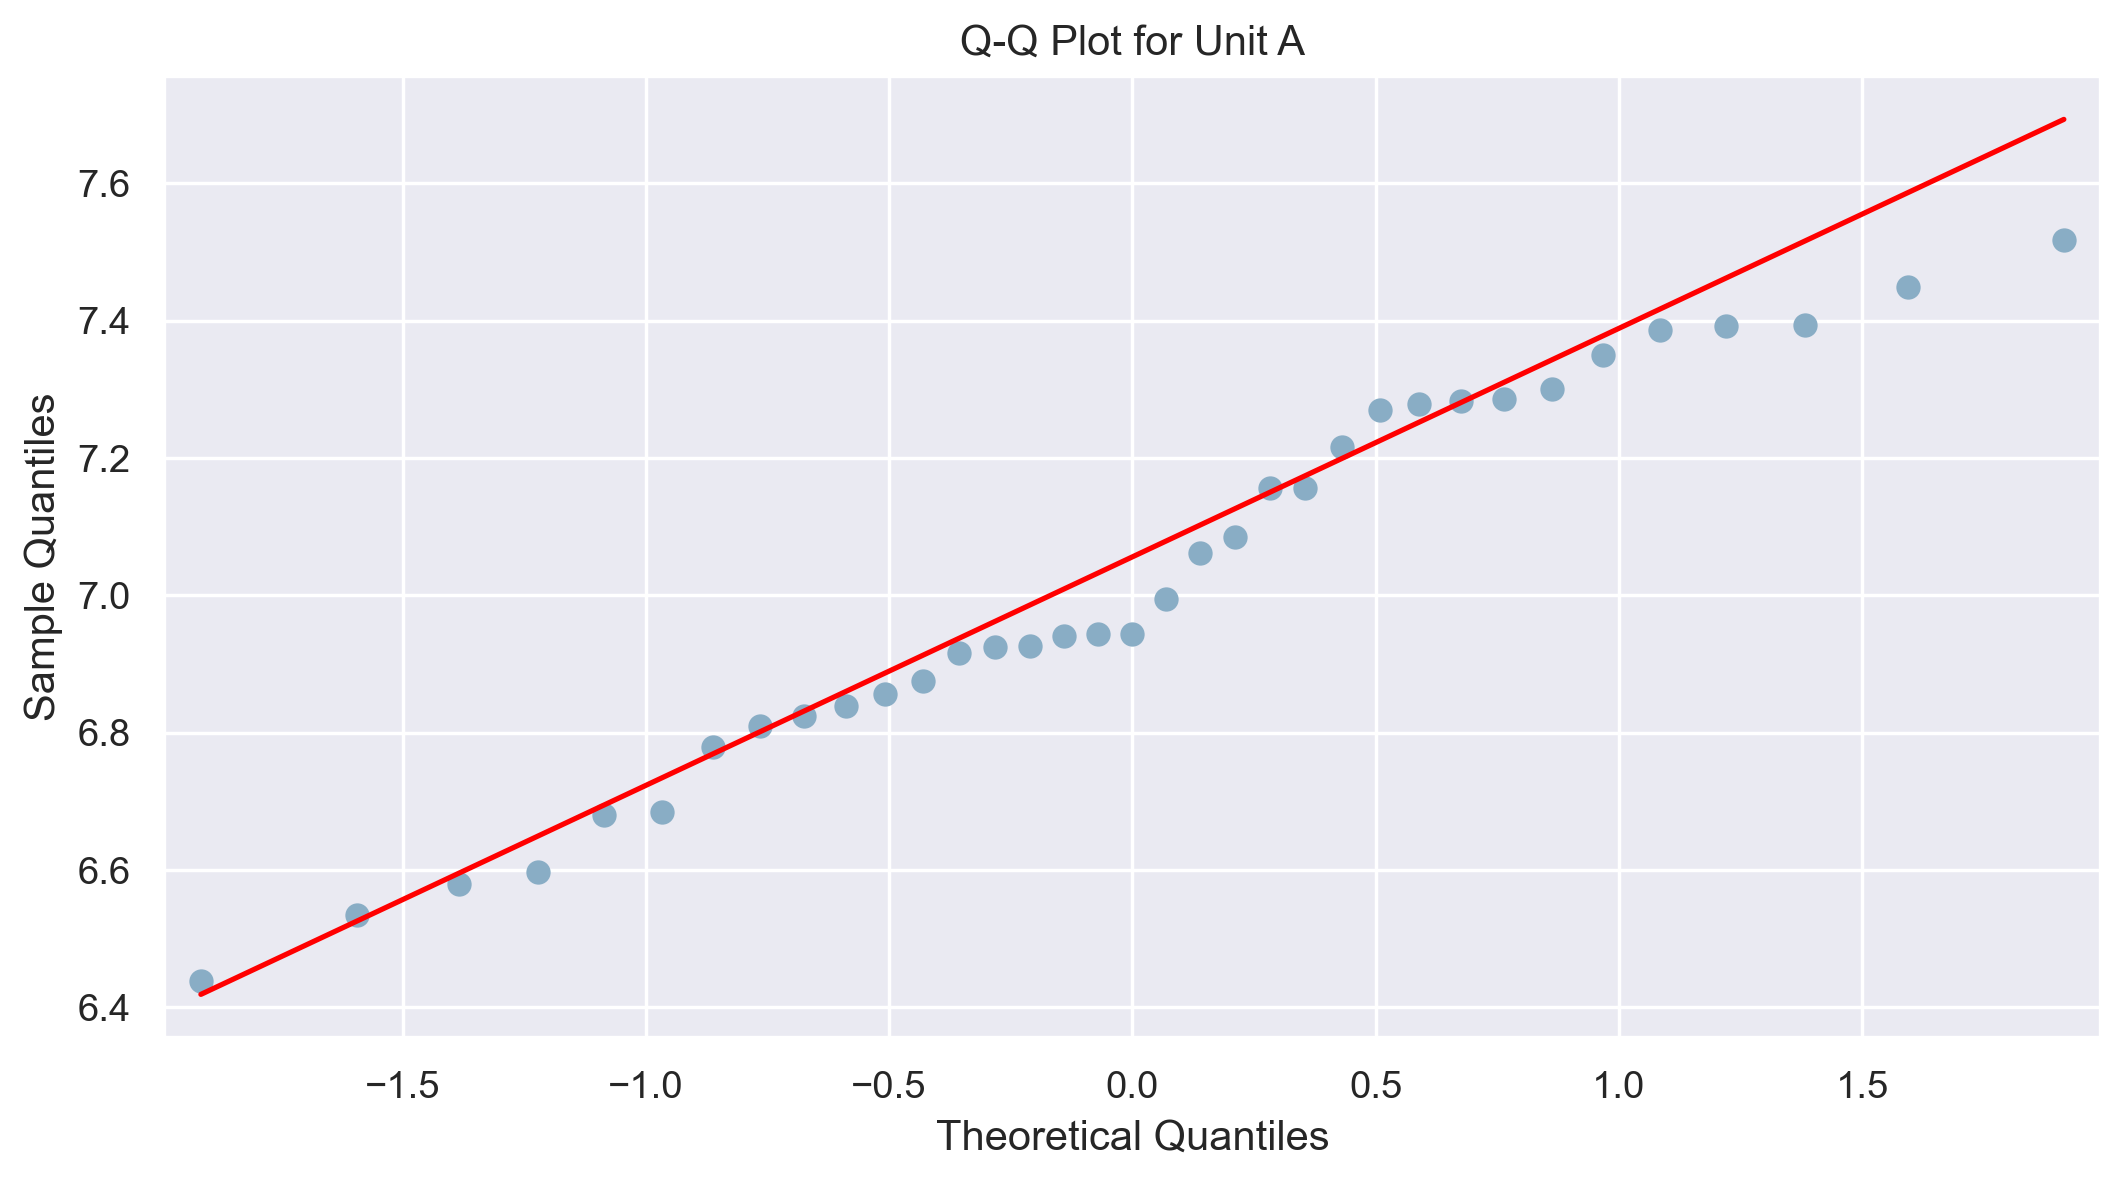

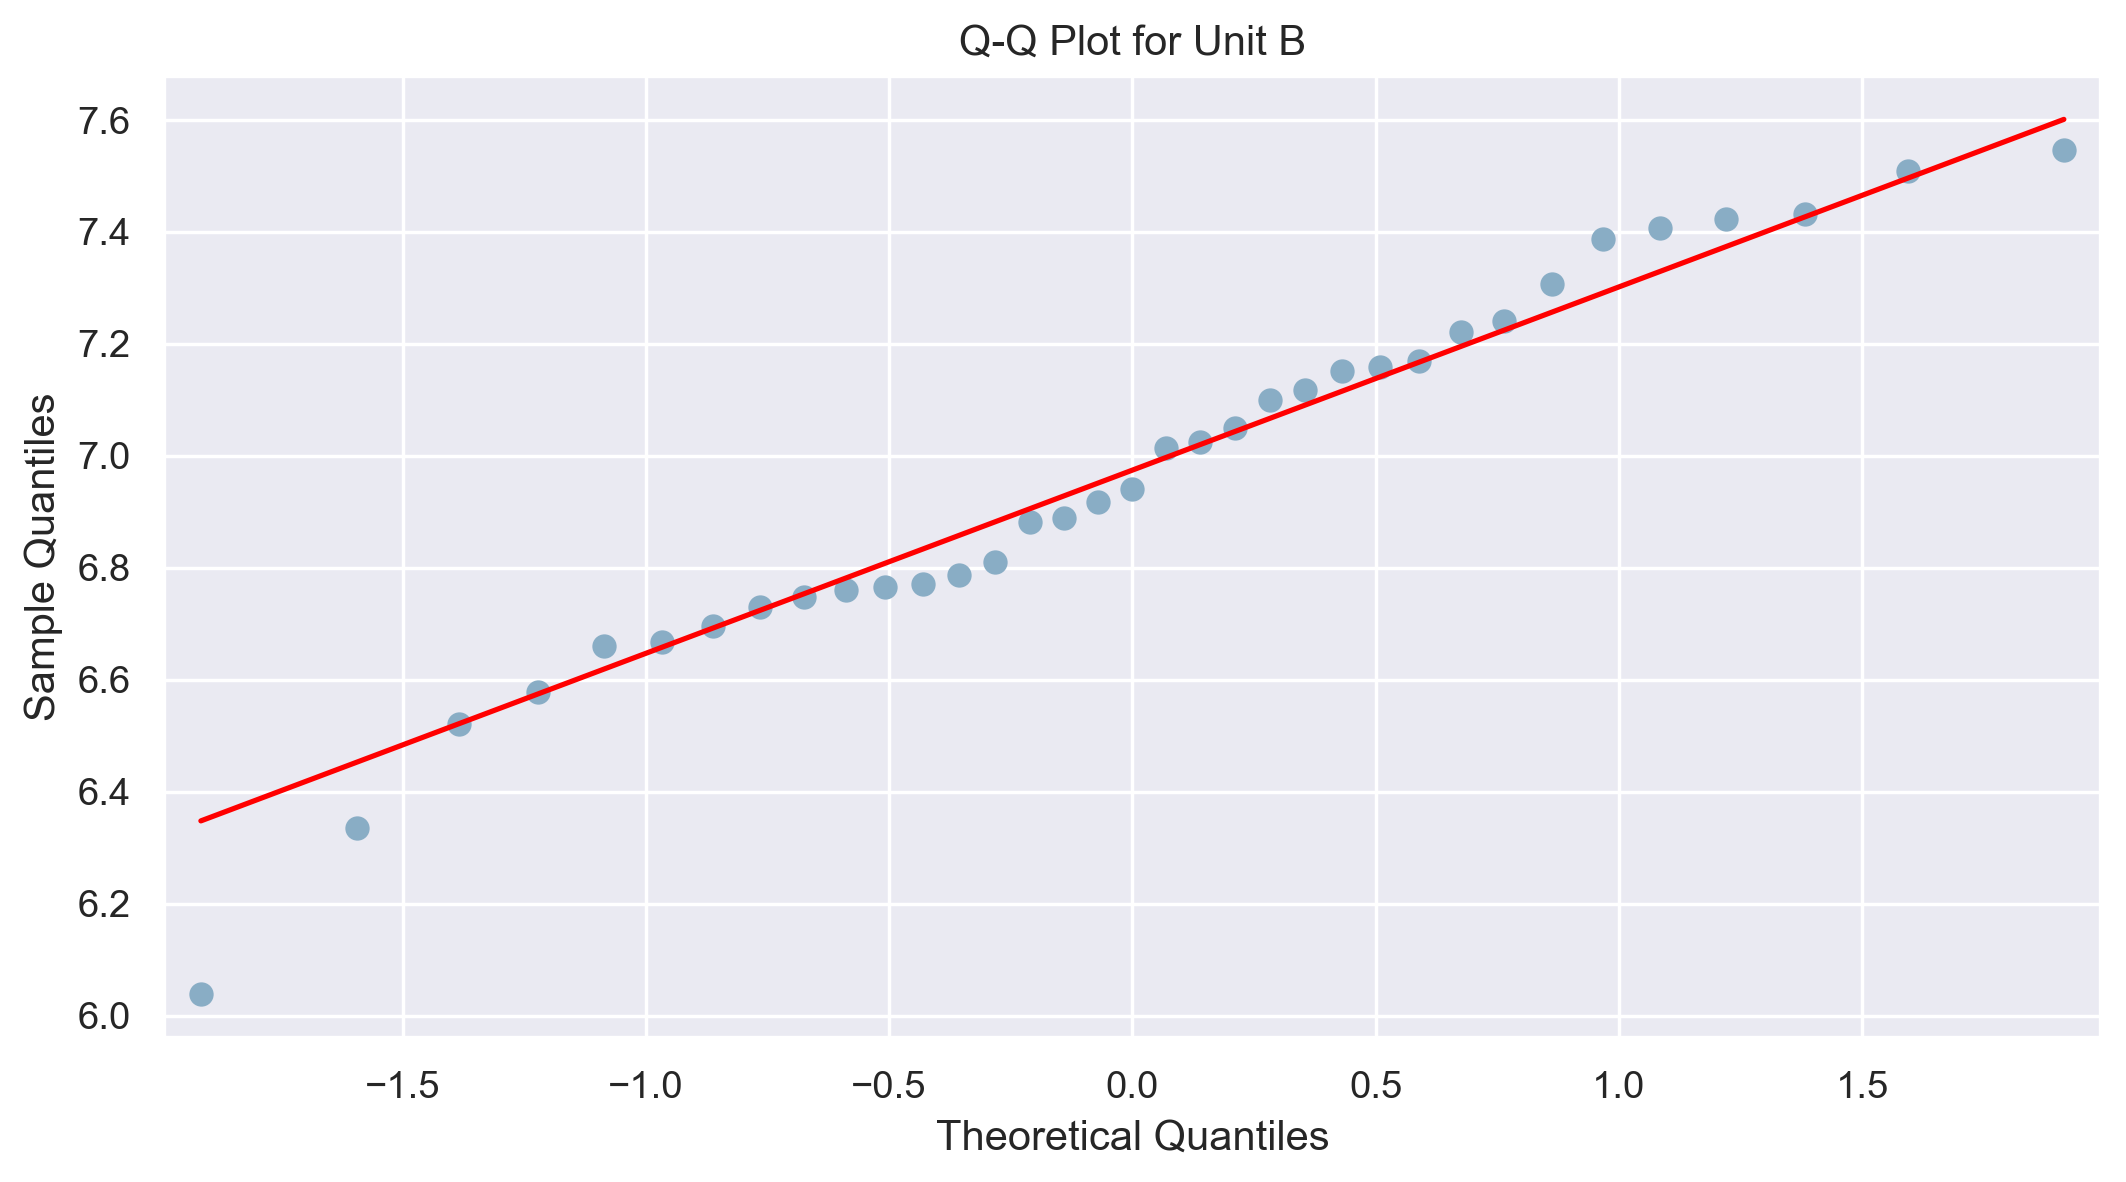

In [10]:
sm.qqplot(data_Q1['Unit A'], line = 'q');
plt.title("Q-Q Plot for Unit A")

sm.qqplot(data_Q1['Unit B'], line = 'q');
plt.title("Q-Q Plot for Unit B")

> * #### We can see the mean of diameter of cutlets from Unit A is 7.019091	and that of Unit B is 6.964297, which are nearly same.
> * #### Data from Unit A and Unit B are Normally Distributed as we can see from Q-Q Plot. As the testing samples should be normally distributed.
> * #### Unit B have one outlier data point but we can neglect it.
> * #### Standard Daviation from Unit A is 0.28 and that of unit B is 0.34, which nearly colse. As variance of testing samples should be nearly equal. 

<br>

___

* ### <font color = 'blue'> <u> HYPOTHESIS TESTING  </u>

##### <font color ='green'> <u>Step - I </u> : Defining Null Hypothesis and Alternate Hypothesis
    
    
* ##### Null Hypothesis : $\mu_1 = \mu_2$ ( Mean diameter of cutlets from both Units is euqal )
  
* ##### Alternative Hypthosis: $\mu_1 \neq \mu_2$ ( Mean diameter of cutlets from both Units is not euqal )

##### <font color ='green'> <u>Step - II </u> : Deciding The Test To Perform:
   + ##### As we don't have population parameters we use t-test.
   + #####  We have to check 2 different samples from two different units. 
   + ##### Additionally, we have Inputs as Diameter 1 and Diameter 2 that is Discrete categories and Output is continuous i.e. diameter is a continuous variable.
   
> ### So We will use <font color ='red'><b> Two Sample Two tail t-test </b></font> for our Hypothesis Testing.

##### <font color ='green'> <u>Step - III </u> : Deciding Error Value ($\alpha$):

* ##### Given significance level is 5% and confidence Level is 95%. So, Error value ($\alpha$) is 5% i.e. 0.05.
 * ##### As test is two tailed error gets devided into two parts as 0.025.

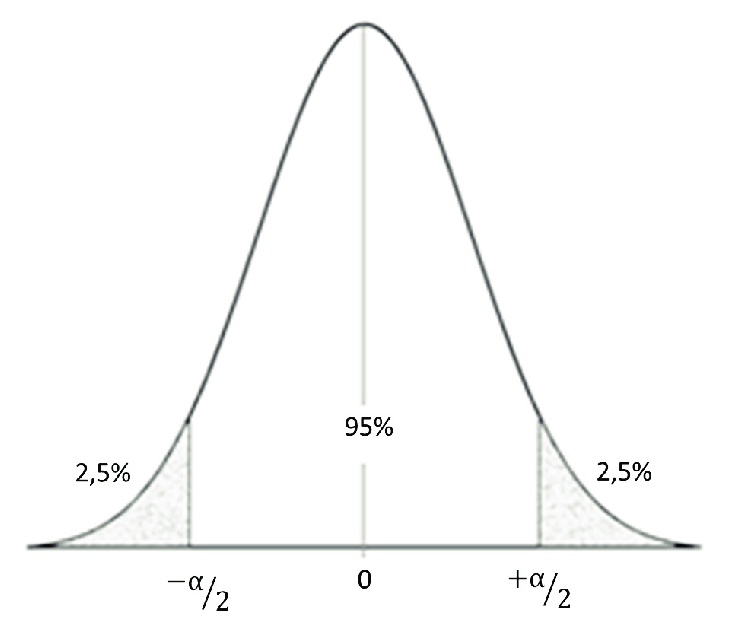

##### <font color ='green'> <u>Step - IV </u> : Calculating p-value:

In [11]:
t_stat_Q1, p_value_Q1 = sp.ttest_ind(data_Q1['Unit A'], data_Q1['Unit B'])
print("t-statisctics = ",t_stat_Q1)
print("p-value = ",p_value_Q1)

t-statisctics =  0.7228688704678063
p-value =  0.4722394724599501


> * #### In Two-sample t-test we get p-value for two tail, which we required in our test.

##### <font color ='green'> <u>Step - V </u> : Final Conclusion :
* ##### If p_value is less than '$\alpha$ '  we reject Null Hypothesis.
* ##### Else we failed to reject Null Hypothesis because of lack of evidence.

In [12]:
alpha = 0.025
if p_value_Q1 <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject null hypothesis.")


Fail to reject null hypothesis.


> * ### As we Fail to reject null hypothesis due to lack of evidence that means we accept null hypothesis. 
> * ### With this test we can conclude that cutlets from both units have no significant difference in their diameter. Therefore, manager need not to take any further action.

<br>
<br>

___

# <font color ="lime"> QUESTION 2️⃣

###    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch time.
### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.  (Minitab File: LabTAT.mtw)

### <font color='magenta'>Solution ➡
    
### <font color='magenta'> Hospital wants to check whether there is any difference in average TAT among the 4 different laboratories, if the differece is observed then they needs to take necessary actions. As there are samples(numerical data) from 4 different laboratories here we use <font color = "Green"> ANOVA test </font> for checking is there any difference in the average Turn Around Time (TAT).

* ### <font color = 'blue'> <u> READ DATA </u>

In [13]:
data_Q2 = pd.read_csv("https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/LabTAT.csv")
data_Q2.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


---

* ### <font color = 'blue'> <u> DATA ANALYSIS </u>

 ##### <font color ='green'> <u>Data Summary</u>

In [14]:
data_Q2.shape

(120, 4)

In [15]:
data_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


##### <font color ='green'> <u>Descriptive statistics</u>

In [16]:
data_Q2.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
data_Q2.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [18]:
data_Q2.duplicated().sum()

0

> * #### There are 120 records for each sample from different laboratories with no null value and no duplicate values.
> * #### From descriptive analysis we can see the mean TAT for four laboratories have much difference.
> * #### Standard Daviation of all four samples is nearly colse. As variance of testing samples should be nearly equal. 

 ##### <font color ='green'> <u>Data Visualisation</u>

<Axes: >

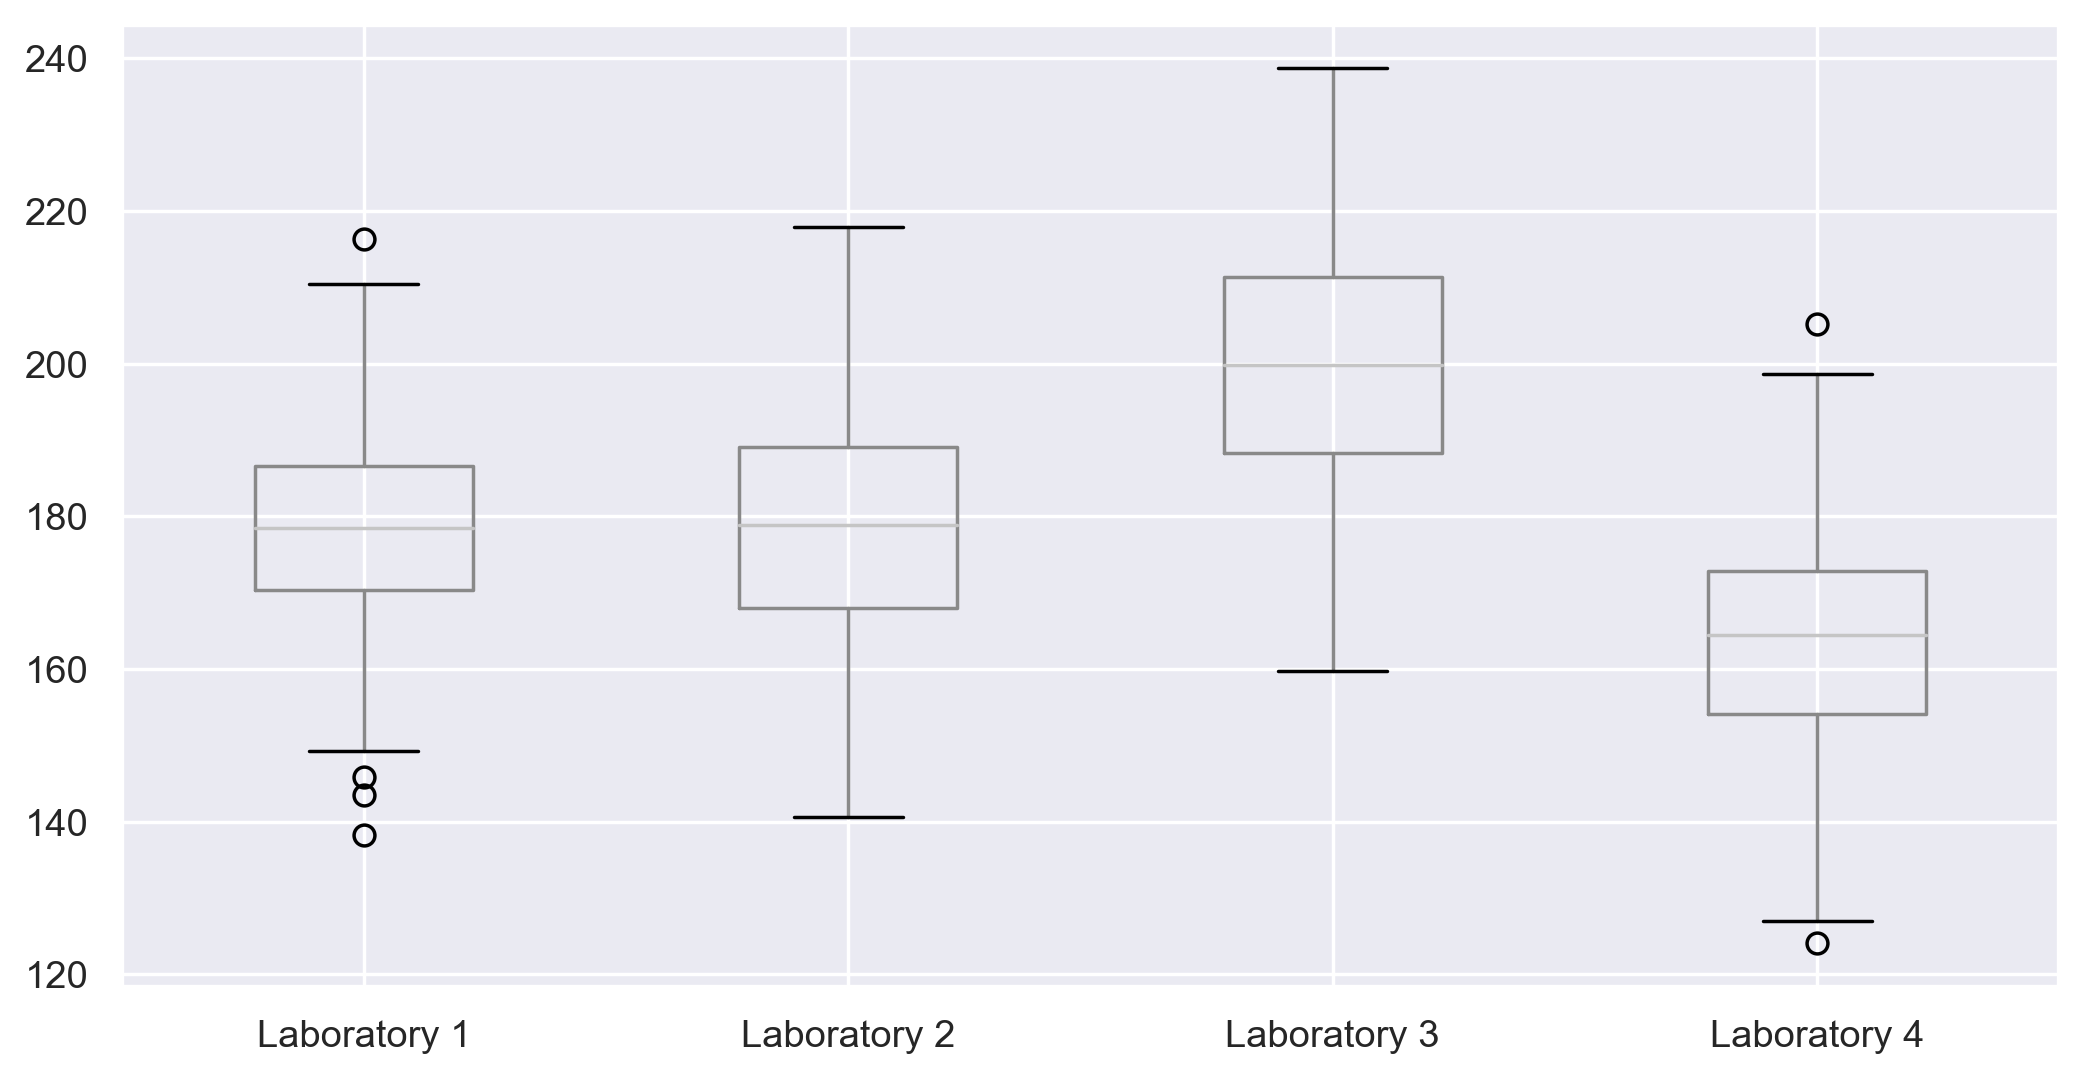

In [19]:
data_Q2.boxplot()

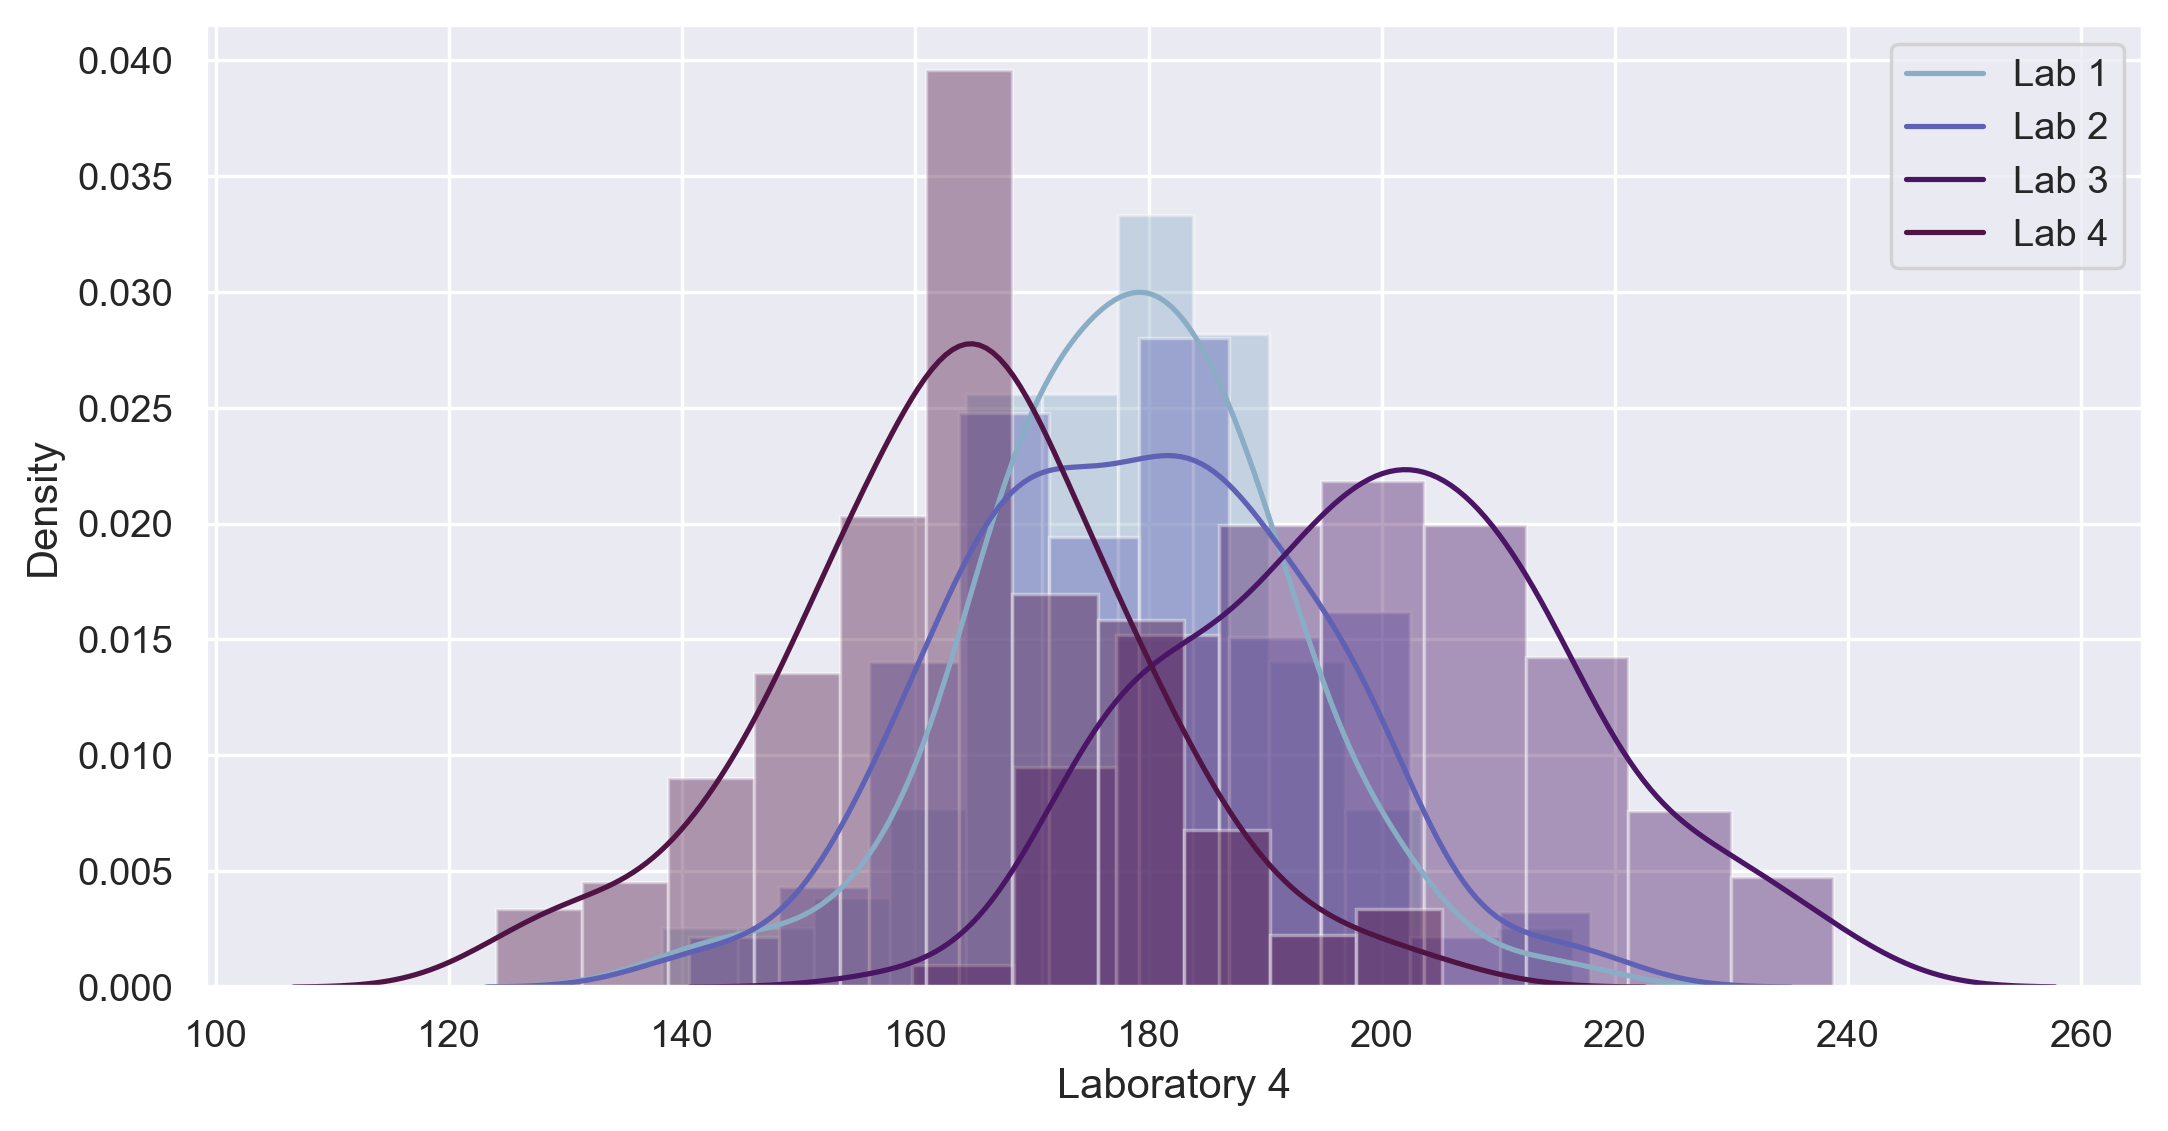

In [20]:
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(data_Q2['Laboratory 1'],hist = True)
sns.distplot(data_Q2['Laboratory 2'],hist = True)
sns.distplot(data_Q2['Laboratory 3'],hist = True)
sns.distplot(data_Q2['Laboratory 4'],hist = True)
plt.legend(labels)

Text(0.5, 1.0, 'Q-Q Plot for Laboratory 4')

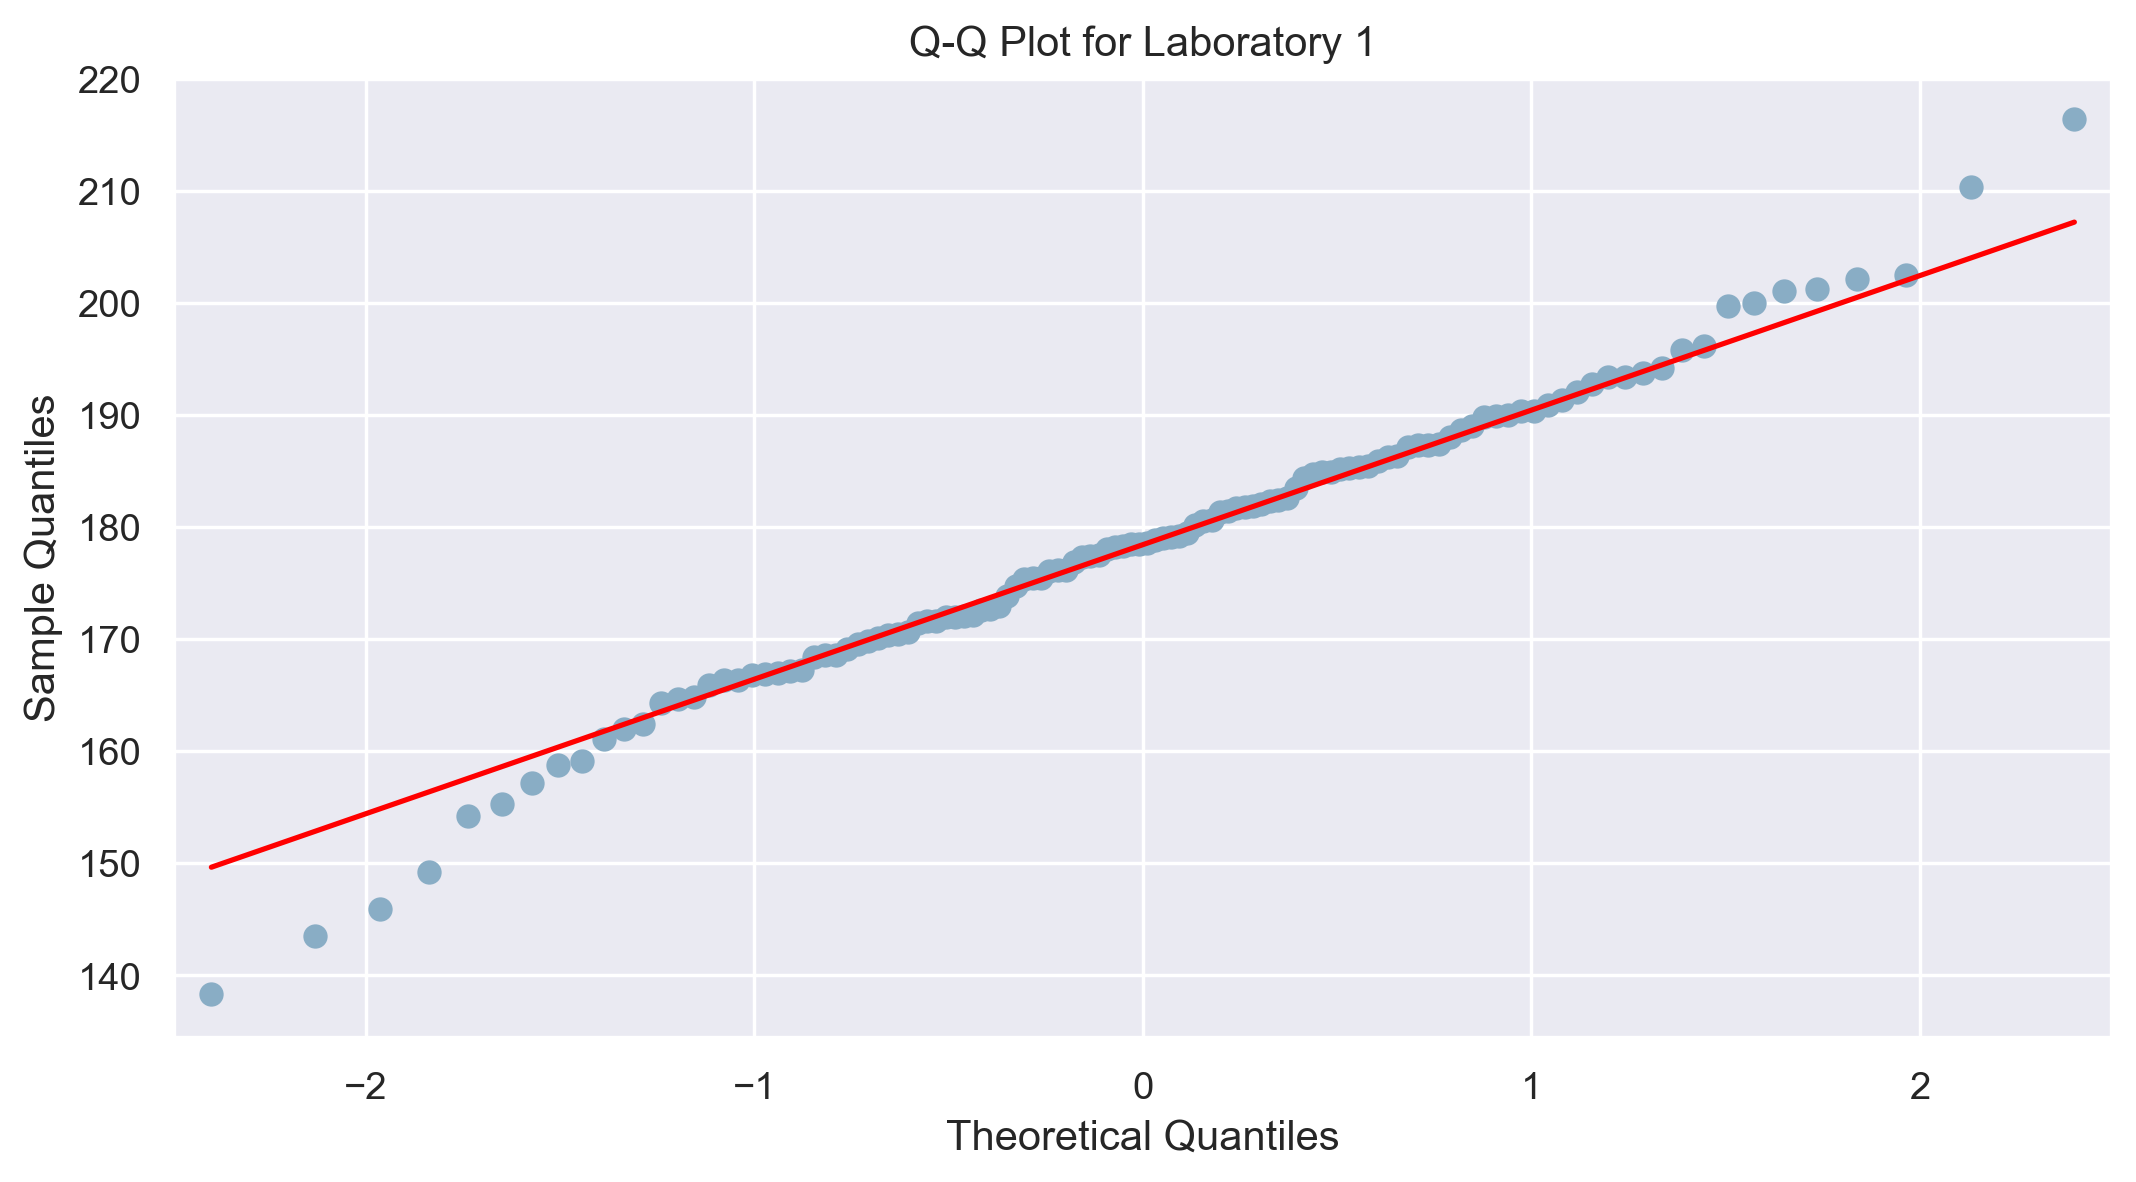

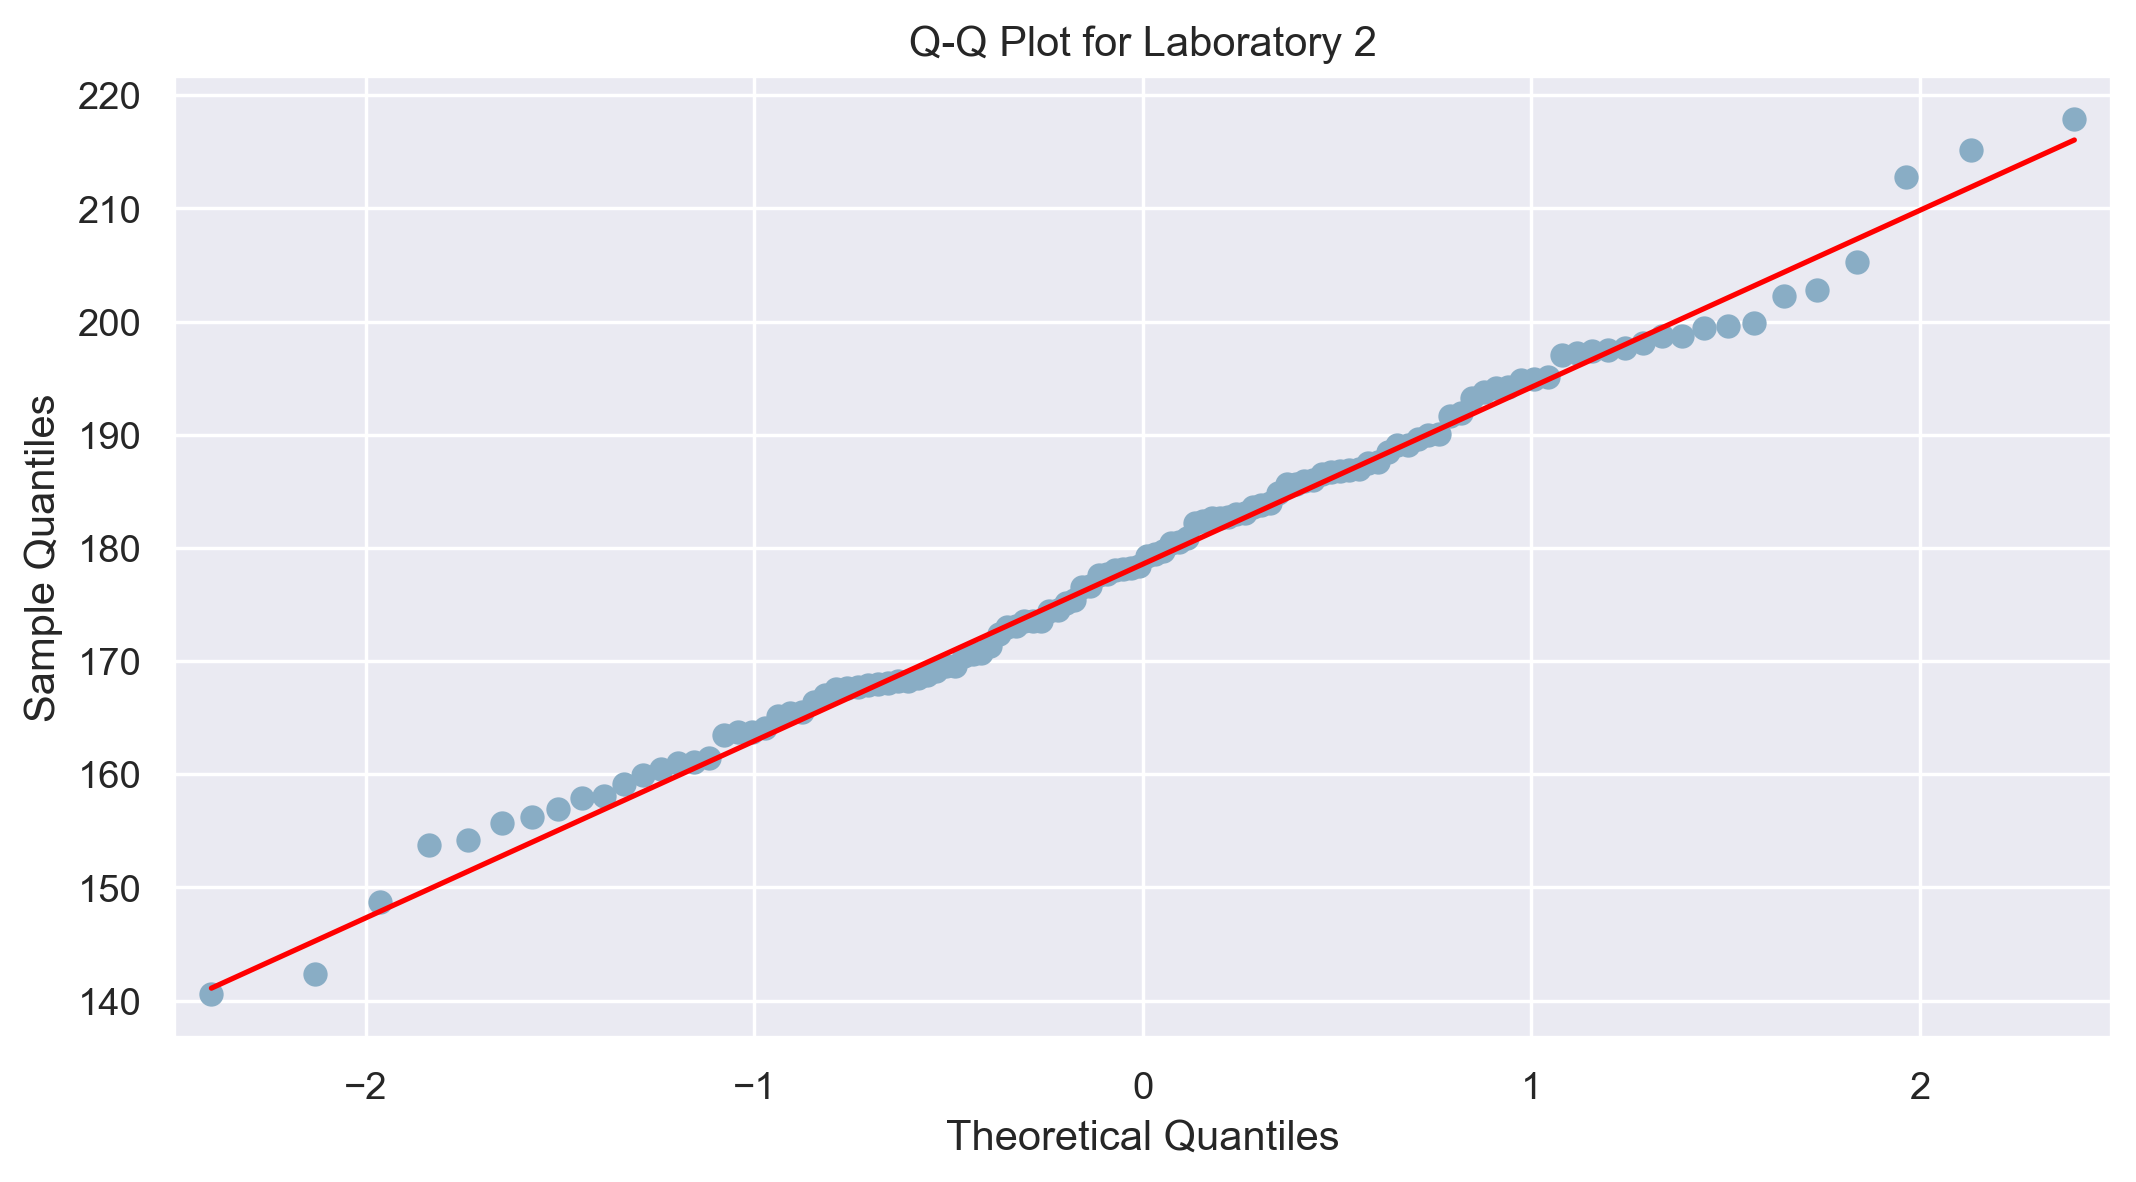

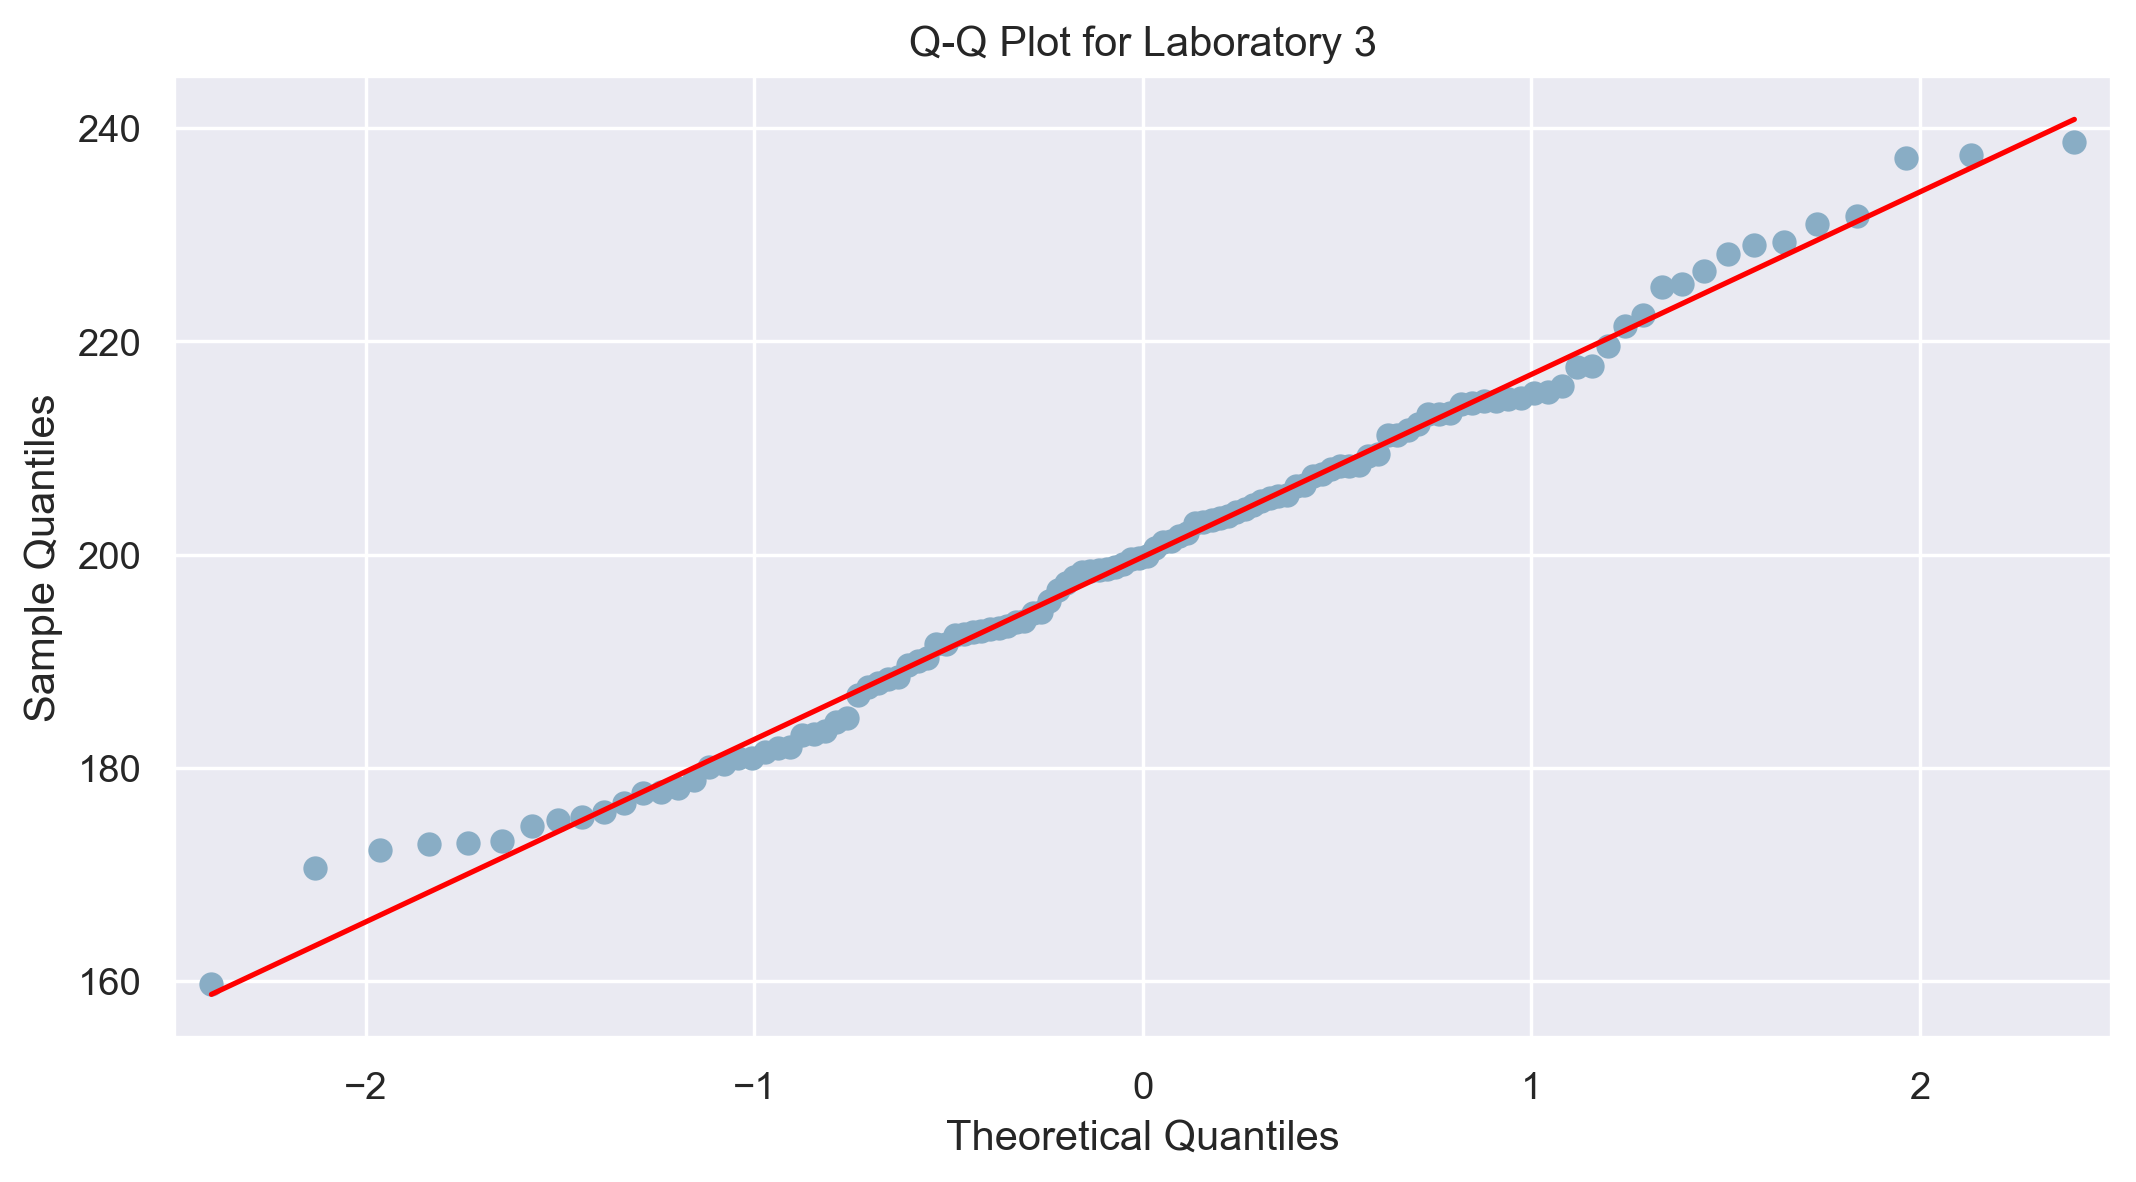

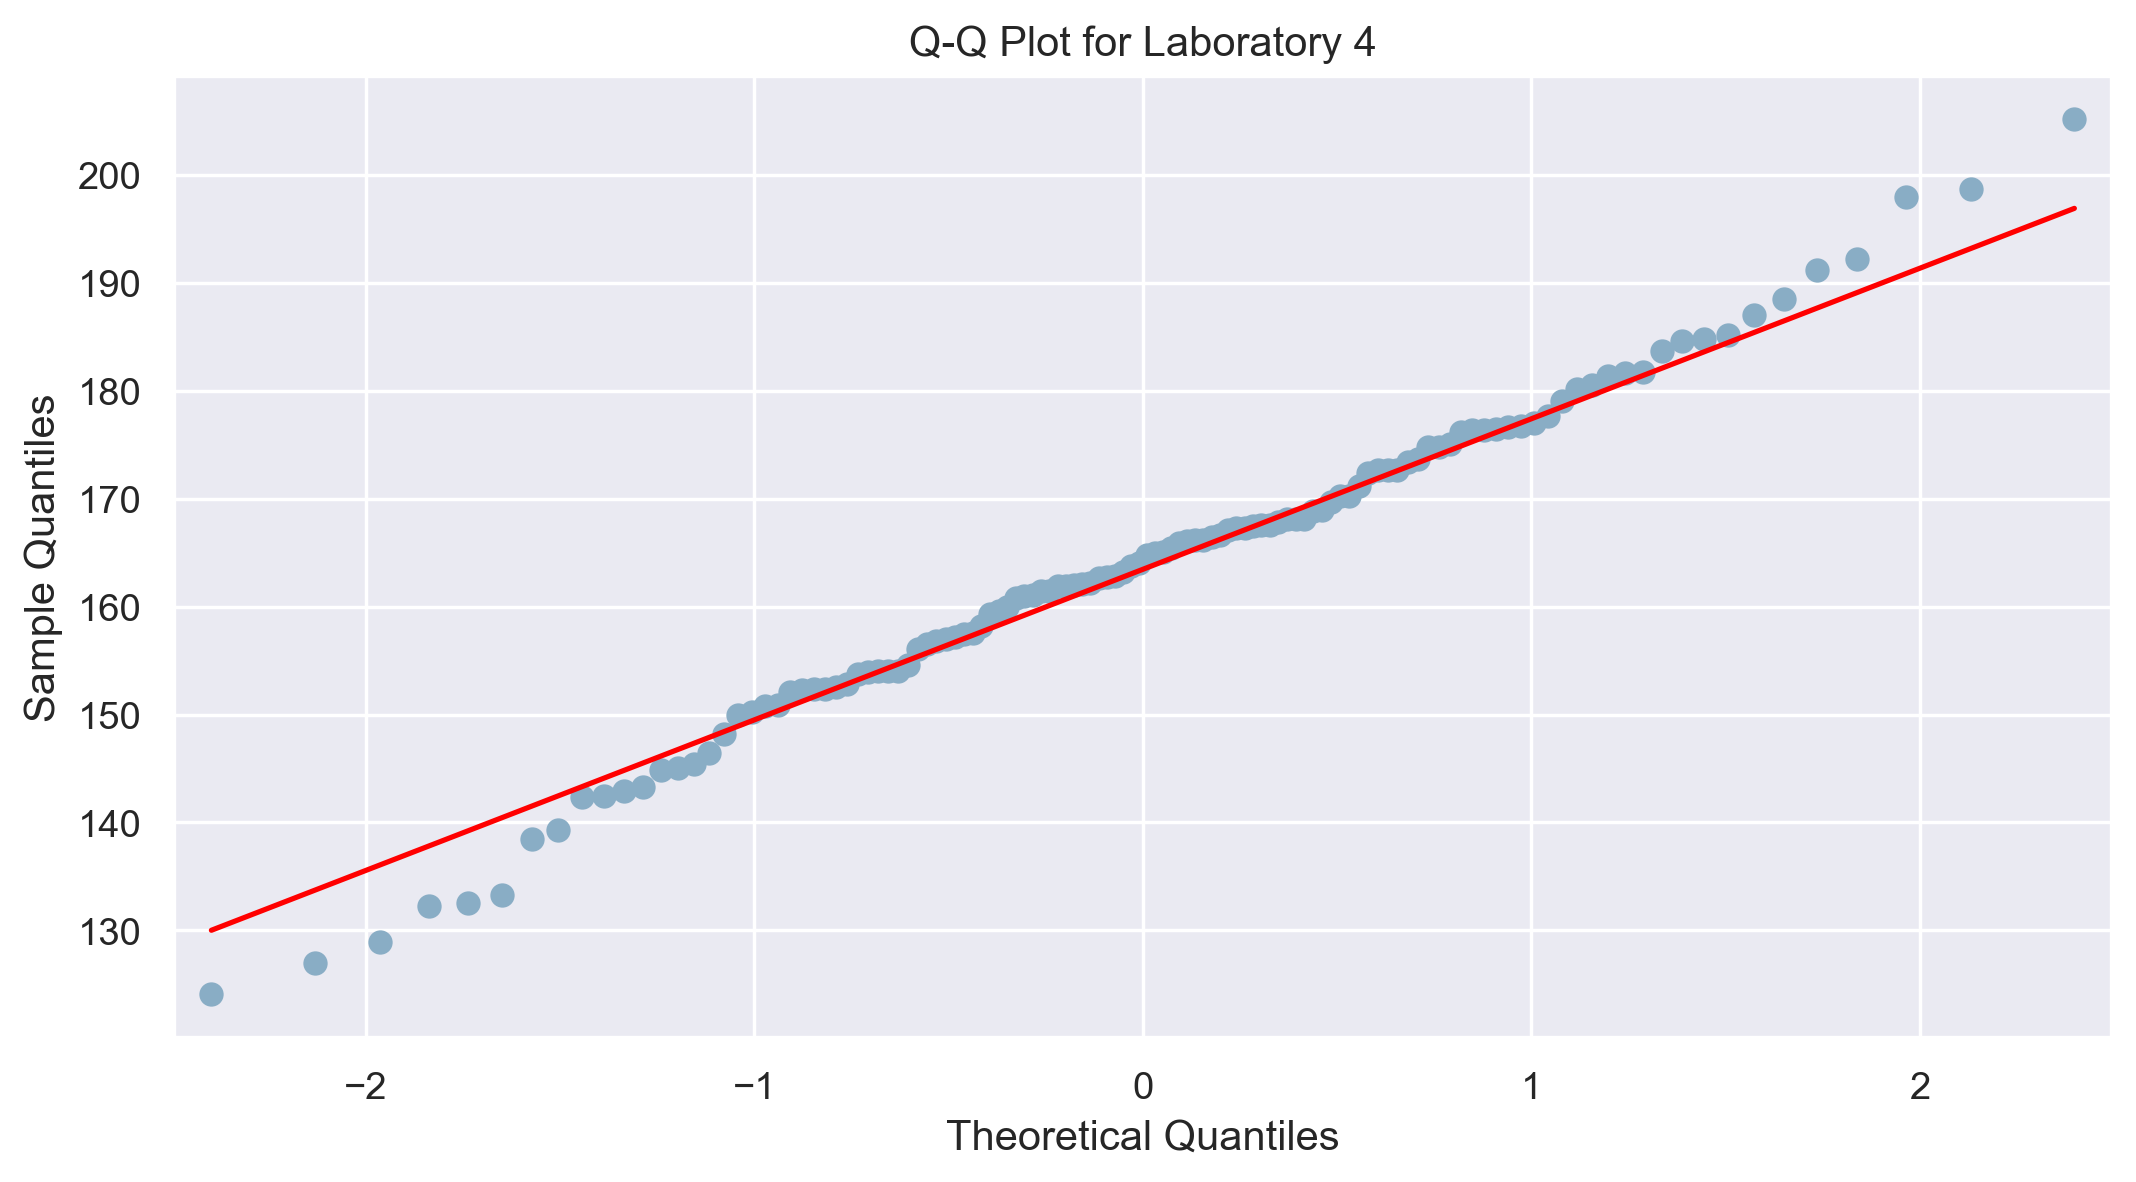

In [21]:
sm.qqplot(data_Q2['Laboratory 1'], line = 'q');
plt.title("Q-Q Plot for Laboratory 1")

sm.qqplot(data_Q2['Laboratory 2'], line = 'q');
plt.title("Q-Q Plot for Laboratory 2")

sm.qqplot(data_Q2['Laboratory 3'], line = 'q');
plt.title("Q-Q Plot for Laboratory 3")

sm.qqplot(data_Q2['Laboratory 4'], line = 'q');
plt.title("Q-Q Plot for Laboratory 4")

> * #### From Boxplot we can observe there are some outliers in Lab-1 and Lab-4 data.
> * #### Form Q-Q Plots and Distribution plot we can see data from all laboratories Data is Normally Distributed. As the testing samples should be normally distributed.

<br>

___

* ### <font color = 'blue'> <u> HYPOTHESIS TESTING  </u>

##### <font color ='green'> <u>Step - I </u> : Defining Null Hypothesis and Alternate Hypothesis
    
    
* ##### Null Hypothesis : $\mu_1 = \mu_2 = \mu_3 = \mu_4$ (Mean TAT of all samples is euqal)
  
* ##### Alternative Hypthosis: At least one of the sample have different mean TAT than other samples.

##### <font color ='green'> <u>Step - II </u> : Deciding The Test To Perform:
   + ##### The data provided to us includes 4 samples and have numerical values so we can't use t-test here.
   
> ###  So We will use <font color ='red'><b> ANOVA test or f- test </b></font> for our Hypothesis Testing.

##### <font color ='green'> <u>Step - III </u> : Deciding Error Value ($\alpha$):

* ##### Given Signifinance Level is 5%. So, Error value ($\alpha$) is 5% i.e. 0.05.

##### <font color ='green'> <u>Step - IV </u> : Calculating p-value:

In [22]:
f_stat_Q2, p_value_Q2 = sp.f_oneway(data_Q2.iloc[:,0], data_Q2.iloc[:,1], data_Q2.iloc[:,2], data_Q2.iloc[:,3])
print("f-statisctics = ",f_stat_Q2)
print("p-value = ",p_value_Q2)

f-statisctics =  118.70421654401437
p-value =  2.1156708949992414e-57


##### <font color ='green'> <u>Step - V </u> : Final Conclusion :
* ##### If p_value is less than '$\alpha$ '  we reject Null Hypothesis.
* ##### Else we failed to reject Null Hypothesis because of lack of evidence.

In [23]:
alpha = 0.05 
if p_value_Q2 <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Reject the null hypothesis.


> * ### Hence as we reject null hypothesis that concludes there is difference in average TAT among the different laboratories.

<br>
<br>

___

# <font color ="lime"> QUESTION 3️⃣

###       Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions. ( Buyer Ratio.mtv)


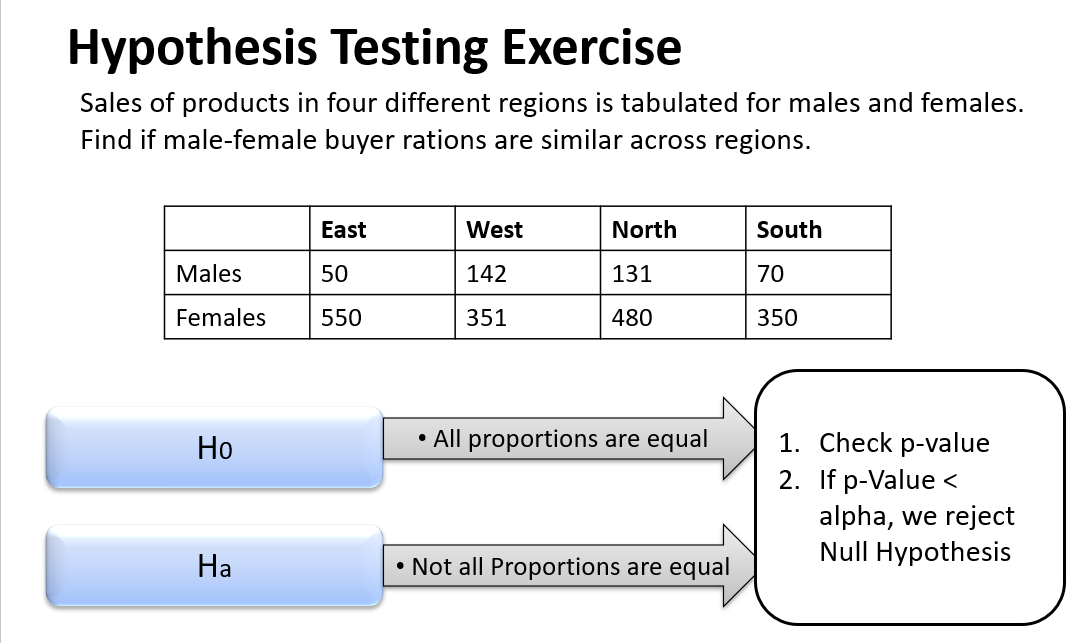

### <font color='magenta'>Solution ➡
    
### <font color='magenta'> Given Buyers Data includes number of male and female buyers from different regions. We are going to find is the male-female ratio across all regions is similar or not with using <font color = "Green"> Chi-Square test $\chi_2$ </font> <b>(Test of Independence)</b>

* ### <font color = 'blue'> <u> READ DATA </u>

In [24]:
data_Q3 = pd.read_csv("https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/BuyerRatio.csv", index_col=0)
data_Q3

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


* ### <font color = 'blue'> <u> HYPOTHESIS TESTING  </u>

##### <font color ='green'> <u>Step - I </u> : Defining Null Hypothesis and Alternate Hypothesis
    
    
* ##### Null Hypothesis : There is no relation or dependency between the gender based buyer rations across regions.(Independent)
 
* ##### Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions.

##### <font color ='green'> <u>Step - II </u> : Deciding The Test To Perform:
   + ##### The data provided to us includes number of buyers males and females from 4 different regions. And we are finding is there any relation between these two categories. 
   
> ###  So We will use <font color ='red'><b> Chi-Square $\chi_2$ Test </b></font> for our Hypothesis Testing.

##### <font color ='green'> <u>Step - III </u> : Deciding Error Value ($\alpha$):

* ##### Signifinance Level is not provided. So, let's assume Error value ($\alpha$) is 5% i.e. 0.05.

##### <font color ='green'> <u>Step - IV </u> : Calculating p-value:

In [25]:
stat_Q3, p_value_Q3, dof, exp_frq = sp.chi2_contingency(data_Q3) 
print("chi-stat =",stat_Q3,"\n","p-value = ",p_value_Q3,"\n","degrees of freedom = ",dof,
      "\n","expected_frequencies :","\n", exp_frq)

chi-stat = 1.595945538661058 
 p-value =  0.6603094907091882 
 degrees of freedom =  3 
 expected_frequencies : 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


##### <font color ='green'> <u>Step - VI </u> : Final Conclusion :
* ##### If p_value is less than '$\alpha$ '  we reject Null Hypothesis.
* ##### Else we failed to reject Null Hypothesis because of lack of evidence.

In [26]:
alpha = 0.05 
if p_value_Q3 <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


> * ### Hence as we failed to reject null hypothesis that means there is no relationship between male-female buyers ratio, i.e. male-female buyer rations are not similar across regions.

<br>
<br>

___

# <font color ="lime"> QUESTION 4️⃣

 ###      TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences. (Minitab File: CustomerOrderForm.mtw)




### <font color='magenta'>Solution ➡
    
### <font color='magenta'> Manager wants to check whether the defective % varies by centre or not. For this we will use <font color = "Green"> Chi-Square test $\chi_2$ </font> <b>(Test of Independence)</b>   

* ### <font color = 'blue'> <u> READ DATA </u>

In [27]:
data_Q4 = pd.read_csv("https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/Costomer%2BOrderForm.csv")
data_Q4.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


* ### <font color = 'blue'> <u> DATA ANALYSIS </u>

 ##### <font color ='green'> <u>Data Summary</u>

In [28]:
data_Q4.shape

(300, 4)

In [29]:
data_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


##### <font color ='green'> <u>Descriptive statistics</u>

In [30]:
data_Q4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [31]:
data_Q4.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [32]:
data_Q4.nunique()

Phillippines    2
Indonesia       2
Malta           2
India           2
dtype: int64

In [33]:
print(data_Q4.value_counts(['Phillippines']),'\n','\n', 
      data_Q4.value_counts(['Indonesia']),'\n','\n',
      data_Q4.value_counts(['Malta']),'\n','\n',
      data_Q4.value_counts(['India']))

Phillippines
Error Free      271
Defective        29
dtype: int64 
 
 Indonesia 
Error Free    267
Defective      33
dtype: int64 
 
 Malta     
Error Free    269
Defective      31
dtype: int64 
 
 India     
Error Free    280
Defective      20
dtype: int64


> * #### There are 300 records for each sample from different centers with no null value and two unique values, i.e., 'Error Free' and 'Defective'.
> * #### Now for chi-square test we need to create contingency table of observed frequencies with help of data we extracted.

 ##### <font color ='green'> <u>Contingency Table</u>

In [34]:
contingency_table_Q4 = [[271,267,269,280],
                        [29,33,31,20]]
print(contingency_table_Q4)

[[271, 267, 269, 280], [29, 33, 31, 20]]


___

* ### <font color = 'blue'> <u> HYPOTHESIS TESTING  </u>

##### <font color ='green'> <u>Step - I </u> : Defining Null Hypothesis and Alternate Hypothesis
    
    
* ##### Null Hypothesis : The Defective % varies by centre. No relation between Defective and Error free order forms.
  
* ##### Alternative Hypthosis: There is relation between Defective and Error free categories and Defective % does not very with centre.

##### <font color ='green'> <u>Step - II </u> : Deciding The Test To Perform:
   + ##### The data provided to us includes samples from 4 centers and have categorical values.
   
> ###  So We will use <font color ='red'> Chi-Square test $\chi_2$ <b>(Test of Independence)</b> </font> for our Hypothesis Testing.

##### <font color ='green'> <u>Step - III </u> : Deciding Error Value ($\alpha$):

* ##### Given Signifinance Level is 5%. So, Error value ($\alpha$) is 5% i.e. 0.05.

##### <font color ='green'> <u>Step - IV </u> : Calculating p-value:

In [35]:
stat_Q4, p_value_Q4, dof, exp_frq_Q4= sp.chi2_contingency(contingency_table_Q4) 
print("chi-stat =",stat_Q4,"\n","p-value = ",p_value_Q4,"\n","degrees of freedom = ",dof,"\n",
      "expected_frequencies :","\n", exp_frq_Q4)

chi-stat = 3.858960685820355 
 p-value =  0.2771020991233135 
 degrees of freedom =  3 
 expected_frequencies : 
 [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


##### <font color ='green'> <u>Step - V </u> : Final Conclusion :
* ##### If p_value is less than '$\alpha$ '  we reject Null Hypothesis.
* ##### Else we failed to reject Null Hypothesis because of lack of evidence.

In [36]:
alpha = 0.05 
if p_value_Q4 <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


> * ### Hence as we fail to reject null hypothesis that concludes the Defective % varies by centre. The Defective and Error free order form categories are independet from each other.
> * ### In addition, we can observe that observed frequencies and expected frequencies are nearly same, implies that Defective and Error free categories are independent. 

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___